In [126]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

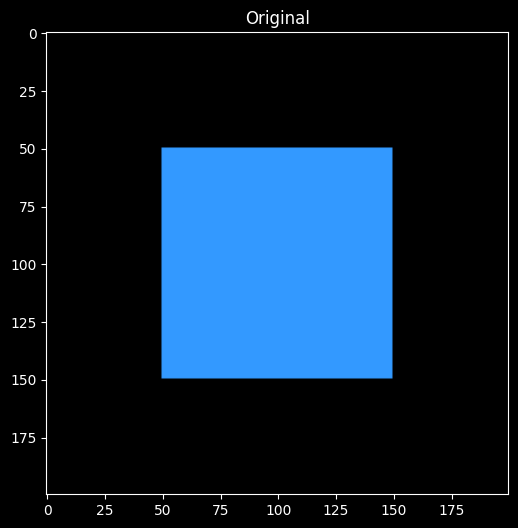

In [54]:
im = np.zeros(shape=(200,200,3), dtype=np.float32)

im[50:150,50:150,0] = 1
im[50:150,50:150,1] = 0.6
im[50:150,50:150,2] = 0.2

plt.imshow(im[:, :, ::-1])
plt.title("Original")
plt.show()

## Translate Image

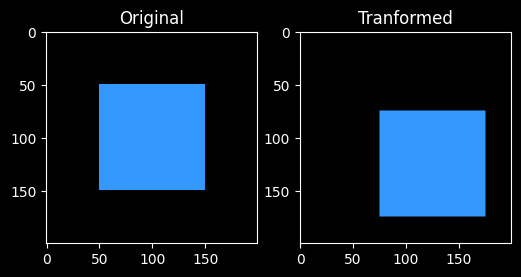

In [55]:
outDIm = im.shape[0:2]

warpMat = np.float32([
    [1.0, 0.0, 25],
    [0.0, 1.0, 25]
])

result =cv2.warpAffine(im, warpMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

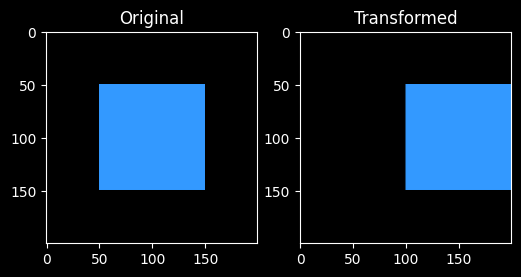

In [56]:
warpMat = np.float32([
    [2.0, 0.0, 0],
    [0.0, 1.0, 0]
])

result =cv2.warpAffine(im, warpMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Scale Image width

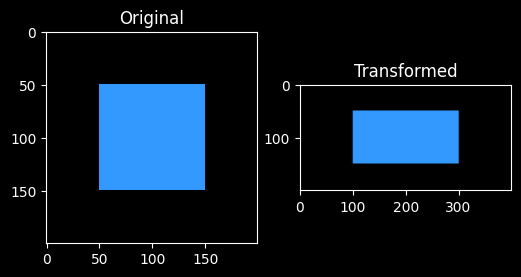

In [57]:
warpMat = np.float32([
    [2.0, 0.0, 0],
    [0.0, 1.0, 0]
])

result =cv2.warpAffine(im, warpMat, (2 * outDIm[0], outDIm[1]))

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Scale along both dimensions

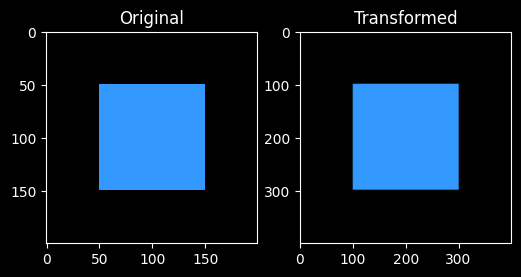

In [58]:
warpMat = np.float32([
    [2.0, 0.0, 0],
    [0.0, 2.0, 0]
])

result =cv2.warpAffine(im, warpMat, (2 * outDIm[0], 2 * outDIm[1]))

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Rotate Imagem about the origin (0,0)

In [46]:
angleDegrees = 30
angleRadians = angleDegrees * np.pi / 180.0
print(f"Angle in Radians: {angleRadians}")

cosTheta = np.cos(angleRadians)
sinTheta = np.sin(angleRadians)
print(f"Cos Theta:{cosTheta}, Sin Theta: {sinTheta}")

Angle in Radians: 0.5235987755982988
Cos Theta:0.8660254037844387, Sin Theta: 0.49999999999999994


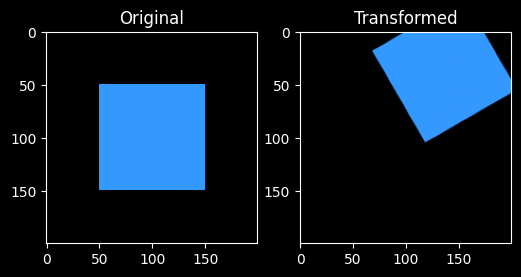

In [59]:
warpMat = np.float32([
    [cosTheta, sinTheta, 0],
    [-sinTheta, cosTheta, 0]
])

result = cv2.warpAffine(im, warpMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Rotate Imagem about specific point

In [48]:
angleDegrees = 30
angleRadians = angleDegrees * np.pi / 180.0
print(f"Angle in Radians: {angleRadians}")

cosTheta = np.cos(angleRadians)
sinTheta = np.sin(angleRadians)
print(f"Cos Theta:{cosTheta}, Sin Theta: {sinTheta}")

Angle in Radians: 0.5235987755982988
Cos Theta:0.8660254037844387, Sin Theta: 0.49999999999999994


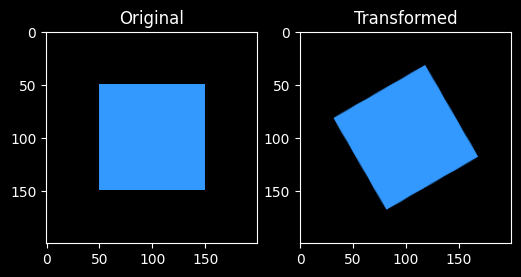

In [60]:
centerX = im.shape[0]/2
centerY = im.shape[1]/2

tx = (1 - cosTheta) * centerX - sinTheta * centerY
ty = sinTheta * centerX + (1 - cosTheta) * centerY

warpMat = np.float32([
    [cosTheta, sinTheta, tx],
    [-sinTheta, cosTheta, ty]
])

result = cv2.warpAffine(im, warpMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Rotate image the earsy way

cv2.getRotationMatrix2D(`center`, `angle`, `scale`)

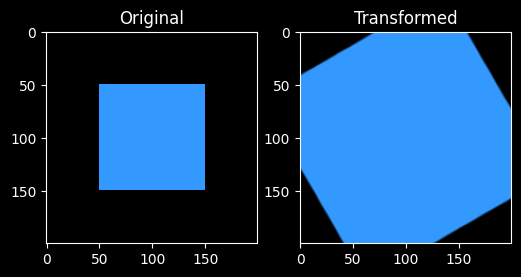

In [61]:
rotationMatrix = cv2.getRotationMatrix2D((centerX, centerY), angleDegrees, 2)

result = cv2.warpAffine(im, rotationMatrix, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Shear Transformation

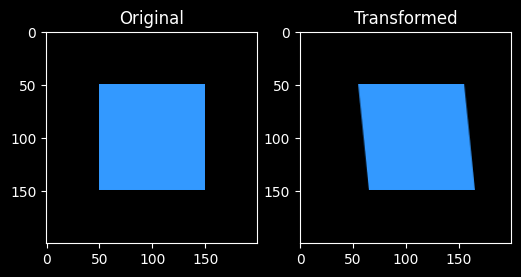

In [62]:
shearAmount = 0.1

warpMat = np.float32([
    [1.0, shearAmount, 0],
    [0.0, 1.0, 0]
])

result = cv2.warpAffine(im, warpMat, outDIm, None, flags = cv2.INTER_LINEAR)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Complex transformation

In [70]:
#scale
scaleAmount = 1.1
scaleMatrix = np.float32([
    [scaleAmount, 0.0, ],
    [0.0, scaleAmount]
])

In [71]:
#shear
shearAmount = -0.1
shearMatrix = np.float32([
    [1.0, shearAmount],
    [0.0, 1.0]
])

In [72]:
#rotate
angleDegrees = 10
angleRadians = angleDegrees * np.pi / 180.0

cosTheta = np.cos(angleRadians)
sinTheta = np.sin(angleRadians)

In [73]:
rotationMatrix = np.float32(
    [
        [cosTheta, sinTheta],
        [-sinTheta, cosTheta]
    ])

translateVector = np.float32(
    [
        [10],
        [0]
    ])

In [81]:
#@ multiplicação de vatrizes (usando tranformações em sequência)
scaleShearRotate = rotationMatrix @ shearMatrix @ scaleMatrix
print(scaleShearRotate)

[[ 1.0832886   0.08268414]
 [-0.191013    1.1023899 ]]


In [82]:
warpMat = np.append(scaleShearRotate, translateVector, 1)
print(warpMat)

[[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]


In [83]:
outPts = scaleShearRotate @ np.float32([[50,50],
                                        [50, 149],
                                        [149, 50],
                                        [149, 149]]).T + translateVector
print(outPts)

[[ 68.29864   76.48437  175.54419  183.72992 ]
 [ 45.568848 154.70544   26.658562 135.79517 ]]


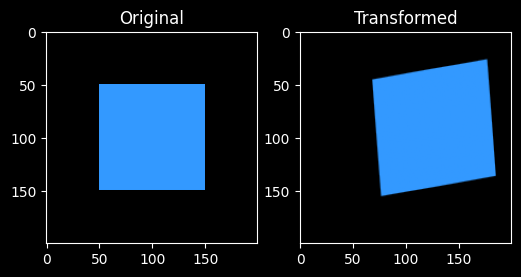

In [84]:
result = cv2.warpAffine(im, warpMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Complex Transformations using 3-Point Correspondences

In [89]:
srcPoints = np.float32([[50,50],
                        [50, 149],
                        [149,50]])

dsrPoints = np.float32([[68,45],
                        [76, 155],
                        [179, 27]])

estimatedMat = cv2.estimateAffine2D(srcPoints, dsrPoints)[0]

print("True warp matrix:\n\n", warpMat)
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

True warp matrix:

 [[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]


Estimated warp matrix:

 [[ 1.12121212  0.08080808  7.8989899 ]
 [-0.18181818  1.11111111 -1.46464646]]


In [91]:
srcPoints = np.float32([[50,50],
                        [50, 149],
                        [149,149],
                        [149, 50]])

dsrPoints = np.float32([[68,45],
                        [76, 155],
                        [183, 135],
                        [176, 27]])

estimatedMat = cv2.estimateAffine2D(srcPoints, dsrPoints)[0]

print("True warp matrix:\n\n", warpMat)
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

True warp matrix:

 [[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]


Estimated warp matrix:

 [[ 1.08585859  0.07575758 10.16919192]
 [-0.19191919  1.1010101   0.04545455]]


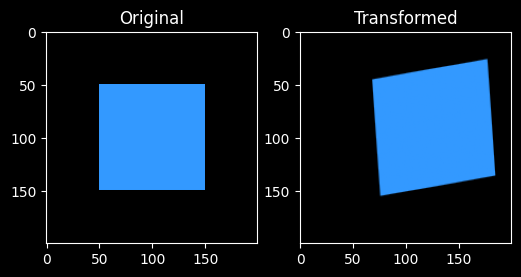

In [92]:
result = cv2.warpAffine(im, estimatedMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(result[:, :, ::-1])
plt.show()

## Limitations of Affine transformation

In [95]:
imT = np.zeros((200, 200, 3), dtype = np.float32)
dstPoints = np.float32([
    [75, 50],
    [50, 149],
    [149,149],
    [124, 50]
])

cv2.fillConvexPoly(imT, np.int32(dstPoints),
                   (1.0, 0.6, 0.2),
                   cv2.LINE_AA);

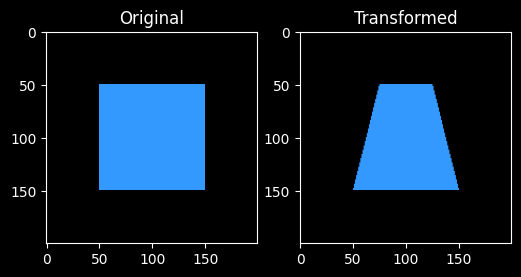

In [96]:
result = cv2.warpAffine(im, estimatedMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(im[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(imT[:, :, ::-1])
plt.show()

In [99]:
estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints)[0]
print("Estimated warp matrix:\n\n",estimatedMat)

Estimated warp matrix:

 [[ 0.49494949 -0.25252525 62.87878788]
 [ 0.          1.          0.        ]]


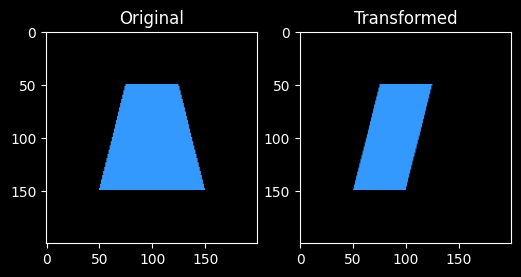

In [100]:
imA = cv2.warpAffine(im, estimatedMat, outDIm)

plt.subplot(121)
plt.title("Original")
plt.imshow(imT[:, :, ::-1])
plt.subplot(122)
plt.title("Transformed")
plt.imshow(imA[:, :, ::-1])
plt.show()

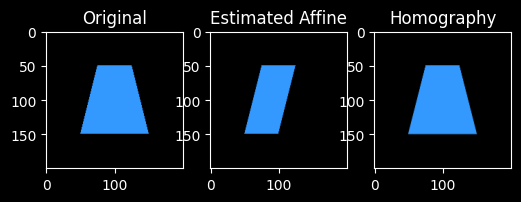

In [103]:
h,  status = cv2.findHomography(srcPoints, dstPoints)

imH = cv2.warpPerspective(im, h, outDIm)

plt.subplot(131)
plt.title("Original")
plt.imshow(imT[:, :, ::-1])
plt.subplot(132)
plt.title("Estimated Affine")
plt.imshow(imA[:, :, ::-1])
plt.subplot(133)
plt.title("Homography")
plt.imshow(imH[:, :, ::-1])
plt.show()

## Teste homography

In [121]:
im1 = cv2.imread(DATA_PATH + '/images/book2.jpg')
im2 = cv2.imread(DATA_PATH + '/images/book1.jpg')

pts1 = np.array(
    [[141, 132],
     [480, 159],
     [493, 630],
     [64, 601]
    ], dtype=float)

pts2 = np.array(
    [[318, 256],
     [534, 372],
     [316, 670],
     [73, 473]
     ], dtype=float)

In [122]:
h, status = cv2.findHomography(pts1, pts2)
print(h)

[[ 4.35830227e-01 -4.20547065e-01  2.92188186e+02]
 [ 1.49657325e-01  4.43068445e-01  1.60415726e+02]
 [-3.57945600e-04 -9.10615518e-05  1.00000000e+00]]


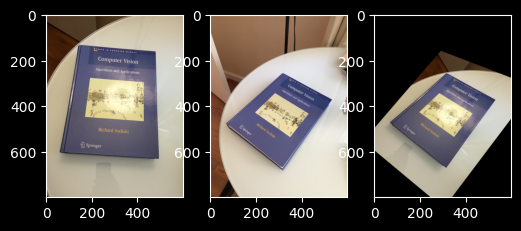

In [125]:
im_out = cv2.warpPerspective(im1, h, (im2.shape[1], im2.shape[0]))

plt.subplot(131)
plt.imshow(im1[:, :, ::-1])
plt.subplot(132)
plt.imshow(im2[:, :, ::-1])
plt.subplot(133)
plt.imshow(im_out[:, :, ::-1])
plt.show()

https://docs.opencv.org/4.1.0/da/d6e/tutorial_py_geometric_transformations.html
https://en.wikipedia.org/wiki/Affine_transformation
https://en.wikipedia.org/wiki/Homography_(computer_vision)
https://www.learnopencv.com/homography-examples-using-opencv-python-c/
https://www.learnopencv.com/warp-one-triangle-to-another-using-opencv-c-python/
https://www.youtube.com/watch?v=RxGA0Xufl5U
https://www.youtube.com/watch?v=Ad9e5eoHm9U
https://www.youtube.com/watch?v=PtCQH93GucA